In [17]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

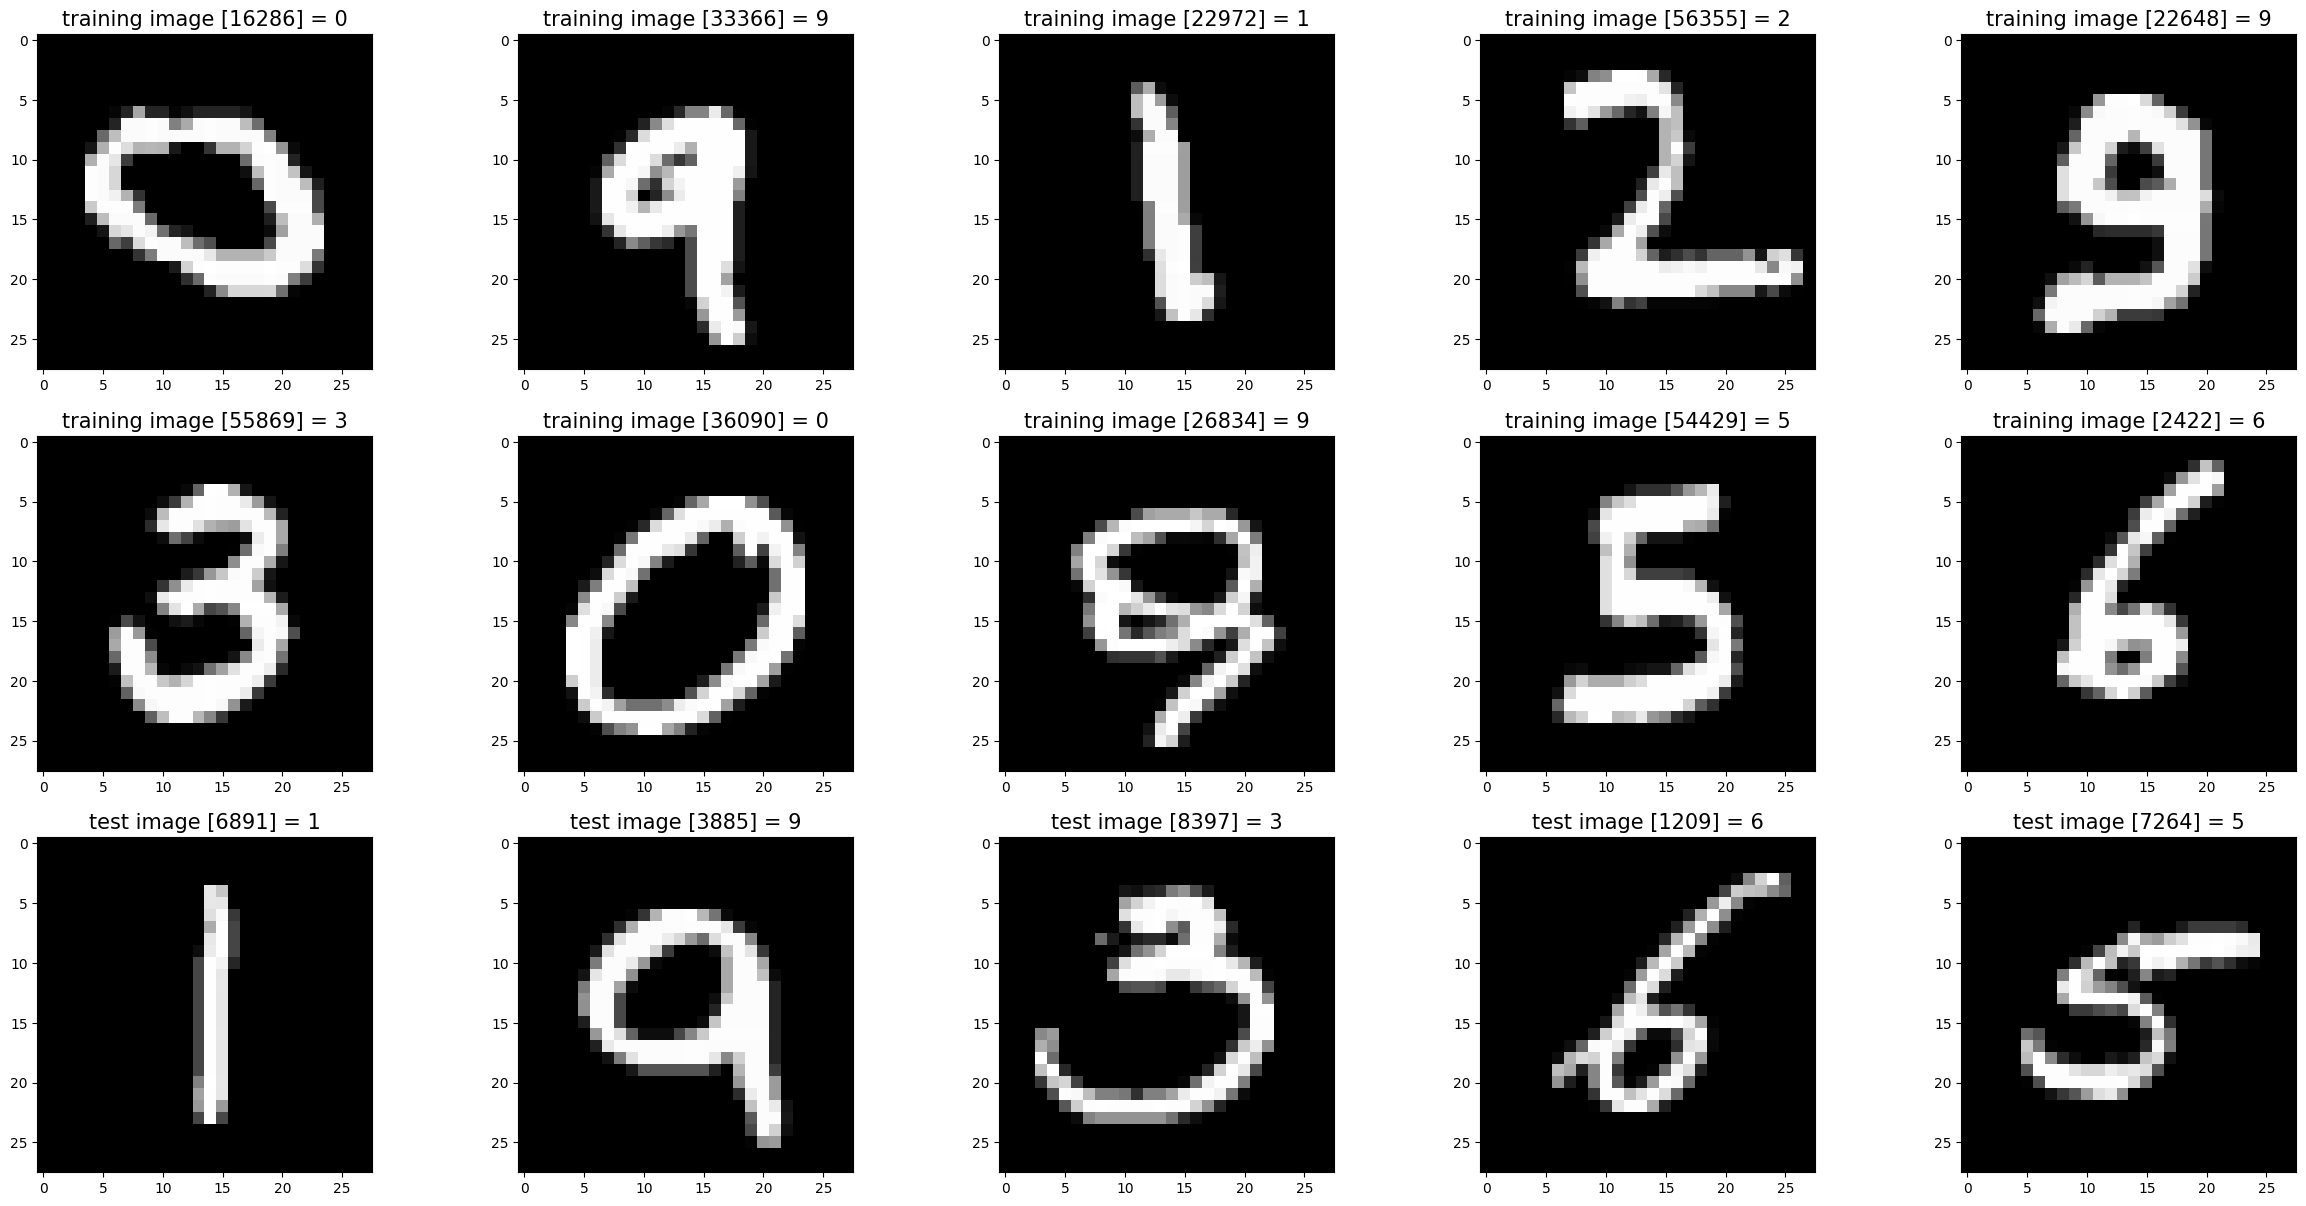

In [18]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../MNIST'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [19]:
print('x_train shape:', len(x_train))
print('x_test shape:', len(x_test))
print('y_train shape:', len(y_train))
print('y_test shape:', len(y_test))

x_train shape: 60000
x_test shape: 10000
y_train shape: 60000
y_test shape: 10000


In [20]:
x_train_np = np.array(x_train)
x_train_np = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_np = np.array(x_test)
x_test_np = x_test_np.reshape(x_test_np.shape[0], -1)

In [21]:
y_train_np = np.zeros((len(y_train), 10))
for i in range(len(y_train)):
    y_train_np[i][y_train[i]] = 1 
y_test_np = np.zeros((len(y_test), 10))
for i in range(len(y_test)):
    y_test_np[i][y_test[i]] = 1

In [22]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the models
models = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
]

# Create parameter grids for each model
param_grids = [
    {},  # No hyperparameters for LinearRegression
    {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]},  # Alpha values for Ridge
    {'lasso__alpha': [0.01, 0.1, 1.0, 10.0]},  # Alpha values for Lasso
    {'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0], 'elasticnet__l1_ratio': [0.1, 0.5, 0.9]}  # Alpha and l1_ratio for ElasticNet
]

# Create pipelines for each model
pipelines = [
    make_pipeline(StandardScaler(), models[0]),
    make_pipeline(StandardScaler(), models[1]),
    make_pipeline(StandardScaler(), models[2]),
    make_pipeline(StandardScaler(), models[3]),
]

# Perform cross-validation and hyperparameter tuning using GridSearchCV
grids = []
fitted_models = []
for pipeline, param_grid in zip(pipelines, param_grids):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(x_train_np, y_train_np)
    grids.append(grid_search)
    fitted_models = grid_search.best_estimator_

In [32]:
for grid in grids:
    print(grid)
    print(grid.best_params_)
    print(grid.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={})
{}
-1.3724841943960178e+24
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0, 100.0]})
{'ridge__alpha': 100.0}
-2.3448974124431397
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.1, 1.0, 10.0]})
{'lasso__alpha': 0.01}
0.5161243068289438
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'

In [51]:
for fitted_model in fitted_models:
    predictions = fitted_model.predict(x_test_np)
    correct_predictions = 0
    wrong_predictions = 0
    
    # Calculate correct and wrong predictions
    for pred, true in zip(np.round(predictions), y_test_np):
        if np.array_equal(pred, true):
            correct_predictions += 1
        else:
            wrong_predictions += 1
    
    # Print results
    print("Model:", fitted_model.steps[1][0])
    print("Correct Predictions:", correct_predictions)
    print("Wrong Predictions:", wrong_predictions)
    print("--------------------------")

Model: linearregression
Correct Predictions: 6697
Wrong Predictions: 3303
--------------------------
Model: ridge
Correct Predictions: 6704
Wrong Predictions: 3296
--------------------------
Model: lasso
Correct Predictions: 4967
Wrong Predictions: 5033
--------------------------
Model: elasticnet
Correct Predictions: 5841
Wrong Predictions: 4159
--------------------------
